<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/Seattle/Regresi%C3%B3n%20Lineal/Hotel_Room.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [495]:
df = pd.read_csv("Seattle_Outliers_categorizacion.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,(92 - 100%) Excelente,(2) Verificación moderada,4,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho
5,24/06/2024,city scrape,Amanda,within an hour,"['email', 'phone']",Whittier Heights,Entire guest suite,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,3,(2) Pocas camas,(5 - 7) Buen número de reseñas mensuales,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    6442 non-null   object 
 1   source                          6442 non-null   object 
 2   host_name                       6442 non-null   object 
 3   host_response_time              6442 non-null   object 
 4   host_verifications              6442 non-null   object 
 5   neighbourhood_cleansed          6442 non-null   object 
 6   property_type                   6442 non-null   object 
 7   room_type                       6442 non-null   object 
 8   bathrooms_text                  6442 non-null   object 
 9   amenities                       6442 non-null   object 
 10  calendar_last_scraped           6442 non-null   object 
 11  host_id                         6442 non-null   int64  
 12  host_since                      64

In [497]:
# Conteo de los tipos de habitaciones
df[["room_type","room_type_num"]].value_counts()

,,count
room_type,room_type_num,
Entire home/apt,0,5387
Private room,2,1024
Hotel room,1,21
Shared room,3,10


In [498]:
# Fragmentamos el dataframe solo con las variables a analizar
df1 = df[["room_type_num","host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness",
          "price","availability_365", "number_of_reviews", "reviews_per_month","review_scores_communication","number_of_reviews_ltm"]]

In [499]:
df1["review_scores_location"]

,review_scores_location
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
6437,5.0
6438,5.0
6439,5.0
6440,5.0


In [500]:
# Corroboramos
df1["room_type_num"].value_counts()

,count
room_type_num,
0,5387
2,1024
1,21
3,10


## Dividir el DataFrame según el tipo de habitación
## Hotel Room | 1

In [501]:
dfHome1 = df1[df1["room_type_num"] == 1]
dfHome1

,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1972,1,100.0,100.0,5.0,5.0,184.0,314,419.0,8.60,5.0,85
4439,1,99.0,95.0,5.0,5.0,192.0,336,1.0,0.11,5.0,1
4971,1,99.0,95.0,5.0,5.0,319.0,343,0.0,1.78,5.0,0
4972,1,99.0,95.0,5.0,5.0,192.0,343,0.0,1.78,5.0,0
4973,1,99.0,95.0,5.0,5.0,319.0,336,1.0,0.17,5.0,1
4974,1,99.0,95.0,5.0,5.0,319.0,330,0.0,1.78,5.0,0
4975,1,99.0,95.0,5.0,5.0,319.0,325,0.0,1.78,5.0,0
5968,1,94.0,92.0,5.0,5.0,197.0,282,0.0,1.78,5.0,0
5969,1,94.0,92.0,5.0,5.0,197.0,278,0.0,1.78,5.0,0
5971,1,94.0,92.0,5.0,5.0,197.0,326,0.0,1.78,5.0,0


## Filtro: “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

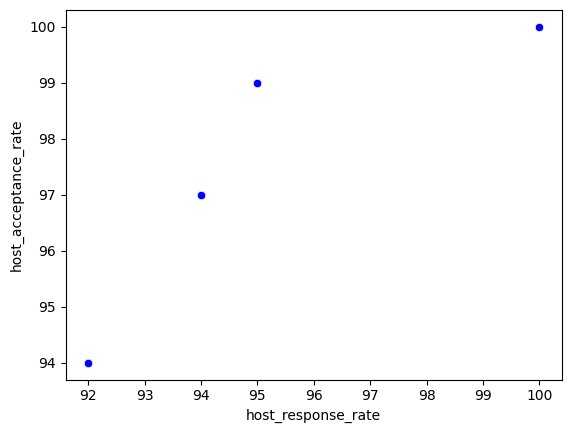

In [502]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome1)

In [503]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome1[["host_response_rate"]] # Independiente = x
Var_Dep = dfHome1[["host_acceptance_rate"]] # Dependiente = y

In [504]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [505]:
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [506]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.06755127]]),
 'rank_': 1,
 'singular_': array([8.88551523]),
 'intercept_': array([-3.65741858])}

## Modelo matemático: y = 1.06755127x - 3.65741858

In [507]:
# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = dfHome1[['host_response_rate']])
y_pred

array([[103.09770808],
       [ 97.75995175],
       [ 97.75995175],
       [ 97.75995175],
       [ 97.75995175],
       [ 97.75995175],
       [ 97.75995175],
       [ 94.55729795],
       [ 94.55729795],
       [ 94.55729795],
       [ 94.55729795],
       [ 94.55729795],
       [ 94.55729795],
       [ 94.55729795],
       [ 94.55729795],
       [ 94.55729795],
       [ 94.55729795],
       [ 96.69240048],
       [ 96.69240048],
       [ 96.69240048],
       [ 96.69240048]])

In [508]:
# Insertamos la columna de predicciones en el df
dfHome1.insert(2, 'Predict1', y_pred)
dfHome1

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1972,1,100.0,103.097708,100.0,5.0,5.0,184.0,314,419.0,8.60,5.0,85
4439,1,99.0,97.759952,95.0,5.0,5.0,192.0,336,1.0,0.11,5.0,1
4971,1,99.0,97.759952,95.0,5.0,5.0,319.0,343,0.0,1.78,5.0,0
4972,1,99.0,97.759952,95.0,5.0,5.0,192.0,343,0.0,1.78,5.0,0
4973,1,99.0,97.759952,95.0,5.0,5.0,319.0,336,1.0,0.17,5.0,1
4974,1,99.0,97.759952,95.0,5.0,5.0,319.0,330,0.0,1.78,5.0,0
4975,1,99.0,97.759952,95.0,5.0,5.0,319.0,325,0.0,1.78,5.0,0
5968,1,94.0,94.557298,92.0,5.0,5.0,197.0,282,0.0,1.78,5.0,0
5969,1,94.0,94.557298,92.0,5.0,5.0,197.0,278,0.0,1.78,5.0,0
5971,1,94.0,94.557298,92.0,5.0,5.0,197.0,326,0.0,1.78,5.0,0


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

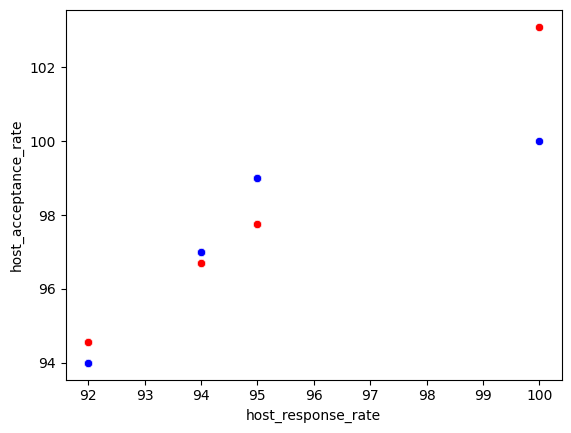

In [509]:
# Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome1)
sns.scatterplot(x = 'host_response_rate', y = 'Predict1', color = "red", data = dfHome1)

In [510]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_0 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_0

0.8013425537988388

In [511]:
# Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl_0 = np.sqrt(coef_Deter_0)
coef_Correl_0

0.8951773867780837

## Filtro: “host_acceptance_rate vs price”

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

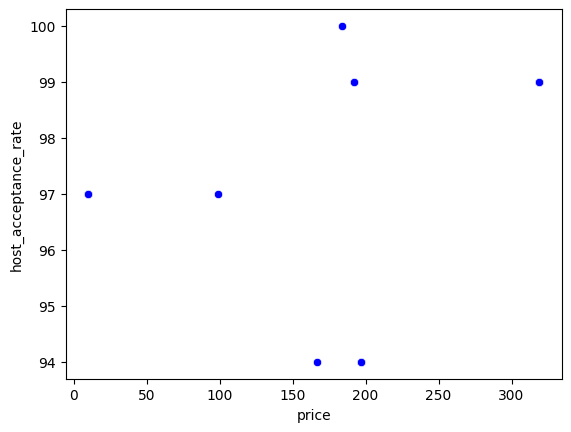

In [512]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome1)

In [513]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome1[["price"]]
Var_Dep = dfHome1[["host_acceptance_rate"]]

In [514]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.00490228]]),
 'rank_': 1,
 'singular_': array([415.66412723]),
 'intercept_': array([95.37225568])}

## Modelo matemático: y = 0.00490228x + 95.37225568

In [515]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "price"
y_pred = model.predict(X = dfHome1[['price']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome1.insert(8, 'Predict2', y_pred)
dfHome1

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1972,1,100.0,103.097708,100.0,5.0,5.0,184.0,314,96.274276,419.0,8.60,5.0,85
4439,1,99.0,97.759952,95.0,5.0,5.0,192.0,336,96.313494,1.0,0.11,5.0,1
4971,1,99.0,97.759952,95.0,5.0,5.0,319.0,343,96.936084,0.0,1.78,5.0,0
4972,1,99.0,97.759952,95.0,5.0,5.0,192.0,343,96.313494,0.0,1.78,5.0,0
4973,1,99.0,97.759952,95.0,5.0,5.0,319.0,336,96.936084,1.0,0.17,5.0,1
4974,1,99.0,97.759952,95.0,5.0,5.0,319.0,330,96.936084,0.0,1.78,5.0,0
4975,1,99.0,97.759952,95.0,5.0,5.0,319.0,325,96.936084,0.0,1.78,5.0,0
5968,1,94.0,94.557298,92.0,5.0,5.0,197.0,282,96.338005,0.0,1.78,5.0,0
5969,1,94.0,94.557298,92.0,5.0,5.0,197.0,278,96.338005,0.0,1.78,5.0,0
5971,1,94.0,94.557298,92.0,5.0,5.0,197.0,326,96.338005,0.0,1.78,5.0,0


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

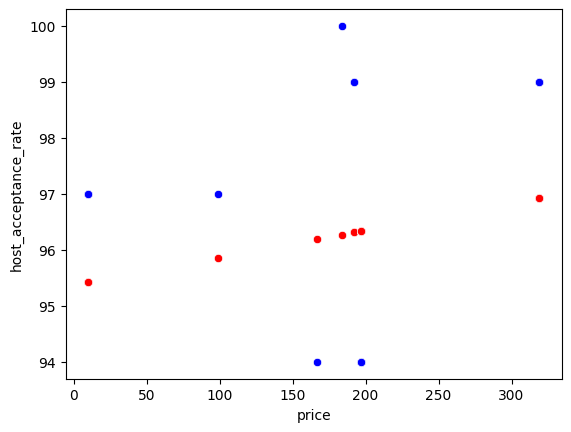

In [516]:
# Gráfica de comparación
sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome1)
sns.scatterplot(x = 'price', y = 'Predict2', color = "red", data = dfHome1)

In [517]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_1 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_1

0.03697917548768759

In [518]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_1 = np.sqrt(coef_Deter_1)
coef_Correl_1

0.19229970225584747

## Filtro: “host_acceptance_rate vs number_of_reviews”

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

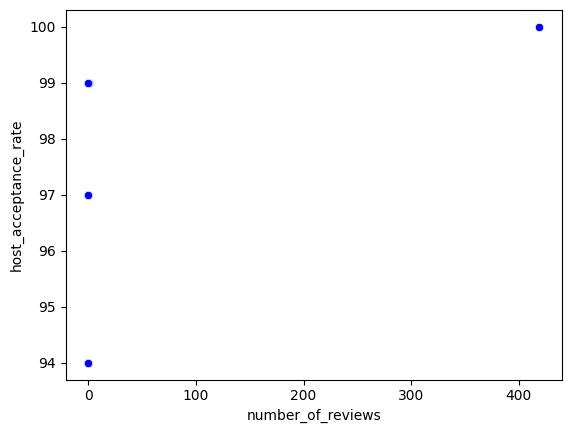

In [519]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome1)

In [520]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome1[["number_of_reviews"]]
Var_Dep = dfHome1[["host_acceptance_rate"]]

In [521]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.0093447]]),
 'rank_': 1,
 'singular_': array([408.80674209]),
 'intercept_': array([96.09837525])}

## Modelo matemático y = 0.0093447x + 96.09837525

In [522]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome1[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome1.insert(1, 'Predict3', y_pred)
dfHome1

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1972,1,100.013806,100.0,103.097708,100.0,5.0,5.0,184.0,314,96.274276,419.0,8.60,5.0,85
4439,1,96.107720,99.0,97.759952,95.0,5.0,5.0,192.0,336,96.313494,1.0,0.11,5.0,1
4971,1,96.098375,99.0,97.759952,95.0,5.0,5.0,319.0,343,96.936084,0.0,1.78,5.0,0
4972,1,96.098375,99.0,97.759952,95.0,5.0,5.0,192.0,343,96.313494,0.0,1.78,5.0,0
4973,1,96.107720,99.0,97.759952,95.0,5.0,5.0,319.0,336,96.936084,1.0,0.17,5.0,1
4974,1,96.098375,99.0,97.759952,95.0,5.0,5.0,319.0,330,96.936084,0.0,1.78,5.0,0
4975,1,96.098375,99.0,97.759952,95.0,5.0,5.0,319.0,325,96.936084,0.0,1.78,5.0,0
5968,1,96.098375,94.0,94.557298,92.0,5.0,5.0,197.0,282,96.338005,0.0,1.78,5.0,0
5969,1,96.098375,94.0,94.557298,92.0,5.0,5.0,197.0,278,96.338005,0.0,1.78,5.0,0
5971,1,96.098375,94.0,94.557298,92.0,5.0,5.0,197.0,326,96.338005,0.0,1.78,5.0,0


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

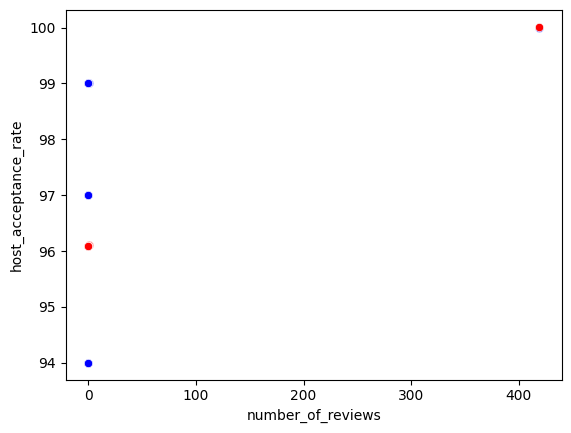

In [523]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome1)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict3', color = "red", data = dfHome1)

In [524]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_2 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_2

0.12996983294863618

In [525]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_2 = np.sqrt(coef_Deter_2)
coef_Correl_2

0.36051329094589035

## Filtro: “review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

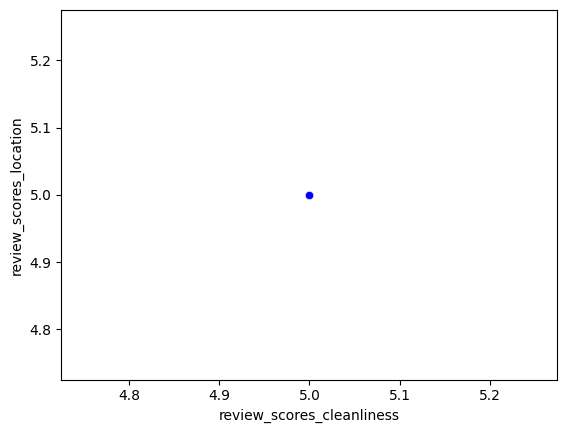

In [526]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome1)

In [527]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome1[["review_scores_cleanliness"]]
Var_Dep = dfHome1[["review_scores_location"]]

In [528]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.]]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': array([5.])}

## Modelo Matemático: y = 0.x + 5.

In [529]:
# Predecimos los valores de "review_scores_location" a partir de la variable "review_scores_cleanliness"
y_pred = model.predict(X = dfHome1[['review_scores_cleanliness']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome1.insert(6, 'Predict4', y_pred)
dfHome1

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1972,1,100.013806,100.0,103.097708,100.0,5.0,5.0,5.0,184.0,314,96.274276,419.0,8.60,5.0,85
4439,1,96.107720,99.0,97.759952,95.0,5.0,5.0,5.0,192.0,336,96.313494,1.0,0.11,5.0,1
4971,1,96.098375,99.0,97.759952,95.0,5.0,5.0,5.0,319.0,343,96.936084,0.0,1.78,5.0,0
4972,1,96.098375,99.0,97.759952,95.0,5.0,5.0,5.0,192.0,343,96.313494,0.0,1.78,5.0,0
4973,1,96.107720,99.0,97.759952,95.0,5.0,5.0,5.0,319.0,336,96.936084,1.0,0.17,5.0,1
4974,1,96.098375,99.0,97.759952,95.0,5.0,5.0,5.0,319.0,330,96.936084,0.0,1.78,5.0,0
4975,1,96.098375,99.0,97.759952,95.0,5.0,5.0,5.0,319.0,325,96.936084,0.0,1.78,5.0,0
5968,1,96.098375,94.0,94.557298,92.0,5.0,5.0,5.0,197.0,282,96.338005,0.0,1.78,5.0,0
5969,1,96.098375,94.0,94.557298,92.0,5.0,5.0,5.0,197.0,278,96.338005,0.0,1.78,5.0,0
5971,1,96.098375,94.0,94.557298,92.0,5.0,5.0,5.0,197.0,326,96.338005,0.0,1.78,5.0,0


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

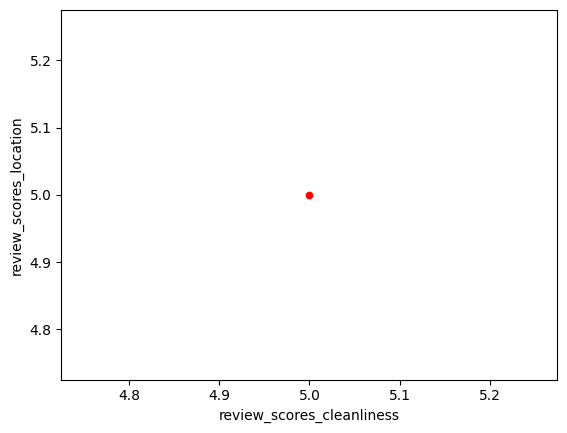

In [530]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome1)
sns.scatterplot(x = 'review_scores_cleanliness', y = 'Predict4', color = "red", data = dfHome1)

In [531]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_3 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_3

1.0

In [532]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_3 = np.sqrt(coef_Deter_3)
coef_Correl_3 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

1.0

## Filtro: availability_365 vs number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

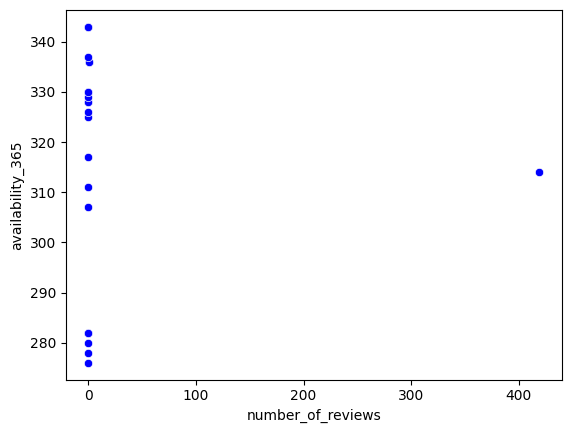

In [533]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome1)

In [534]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome1[["number_of_reviews"]]
Var_Dep = dfHome1[["availability_365"]]

In [535]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.00501484]]),
 'rank_': 1,
 'singular_': array([408.80674209]),
 'intercept_': array([316.19577374])}

## Modelo Matemático: y = -0.00501484x + 316.19577374

In [536]:
# Predecimos los valores de "availability_365" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome1[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome1.insert(7, 'Predict5', y_pred)
dfHome1

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1972,1,100.013806,100.0,103.097708,100.0,5.0,5.0,314.094555,5.0,184.0,314,96.274276,419.0,8.60,5.0,85
4439,1,96.107720,99.0,97.759952,95.0,5.0,5.0,316.190759,5.0,192.0,336,96.313494,1.0,0.11,5.0,1
4971,1,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,319.0,343,96.936084,0.0,1.78,5.0,0
4972,1,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,192.0,343,96.313494,0.0,1.78,5.0,0
4973,1,96.107720,99.0,97.759952,95.0,5.0,5.0,316.190759,5.0,319.0,336,96.936084,1.0,0.17,5.0,1
4974,1,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,319.0,330,96.936084,0.0,1.78,5.0,0
4975,1,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,319.0,325,96.936084,0.0,1.78,5.0,0
5968,1,96.098375,94.0,94.557298,92.0,5.0,5.0,316.195774,5.0,197.0,282,96.338005,0.0,1.78,5.0,0
5969,1,96.098375,94.0,94.557298,92.0,5.0,5.0,316.195774,5.0,197.0,278,96.338005,0.0,1.78,5.0,0
5971,1,96.098375,94.0,94.557298,92.0,5.0,5.0,316.195774,5.0,197.0,326,96.338005,0.0,1.78,5.0,0


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

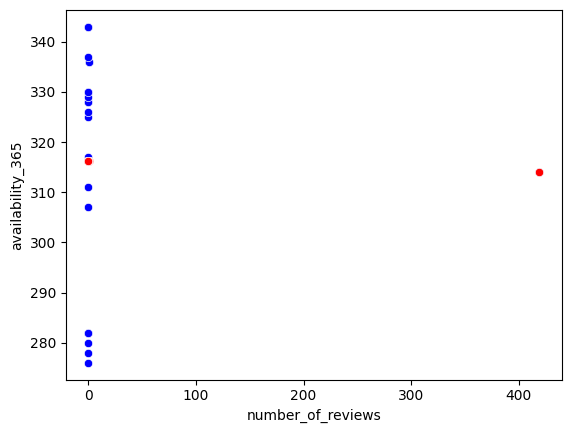

In [537]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome1)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict5', color = "red", data = dfHome1)

In [538]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_4 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_4

0.000400590134396972

In [539]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_4 = np.sqrt(coef_Deter_4)
coef_Correl_4

0.020014747922393928

## Filtro: reviews_per_month vs review_scores_communication

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

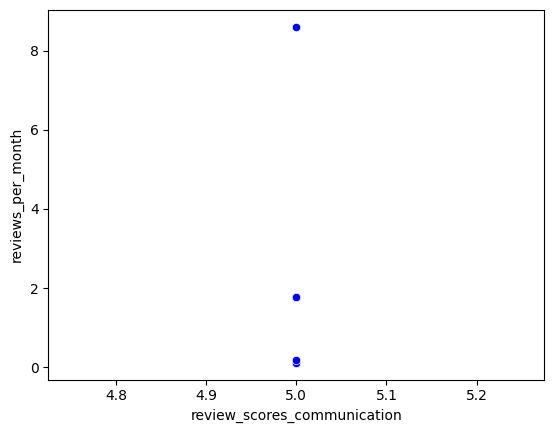

In [540]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome1)

In [541]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome1[["review_scores_communication"]]
Var_Dep = dfHome1[["reviews_per_month"]]

In [542]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.]]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': array([1.94857143])}

## Modelo Matemático: y = 0.x + 1.94857143

In [543]:
# Predecimos los valores de "reviews_per_month" a partir de la variable "review_scores_communication"
y_pred = model.predict(X = dfHome1[['review_scores_communication']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome1.insert(13, 'Predict6', y_pred)
dfHome1

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1972,1,100.013806,100.0,103.097708,100.0,5.0,5.0,314.094555,5.0,184.0,314,96.274276,419.0,1.948571,8.60,5.0,85
4439,1,96.107720,99.0,97.759952,95.0,5.0,5.0,316.190759,5.0,192.0,336,96.313494,1.0,1.948571,0.11,5.0,1
4971,1,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,319.0,343,96.936084,0.0,1.948571,1.78,5.0,0
4972,1,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,192.0,343,96.313494,0.0,1.948571,1.78,5.0,0
4973,1,96.107720,99.0,97.759952,95.0,5.0,5.0,316.190759,5.0,319.0,336,96.936084,1.0,1.948571,0.17,5.0,1
4974,1,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,319.0,330,96.936084,0.0,1.948571,1.78,5.0,0
4975,1,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,319.0,325,96.936084,0.0,1.948571,1.78,5.0,0
5968,1,96.098375,94.0,94.557298,92.0,5.0,5.0,316.195774,5.0,197.0,282,96.338005,0.0,1.948571,1.78,5.0,0
5969,1,96.098375,94.0,94.557298,92.0,5.0,5.0,316.195774,5.0,197.0,278,96.338005,0.0,1.948571,1.78,5.0,0
5971,1,96.098375,94.0,94.557298,92.0,5.0,5.0,316.195774,5.0,197.0,326,96.338005,0.0,1.948571,1.78,5.0,0


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

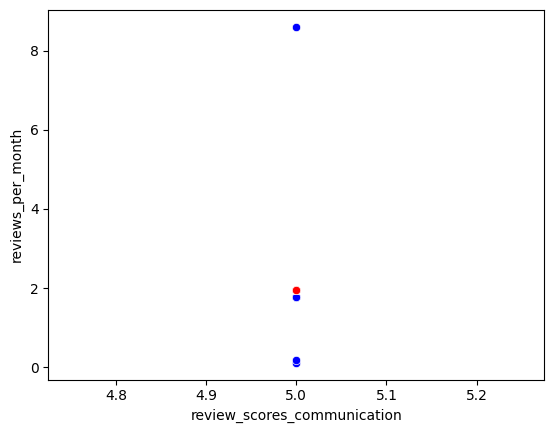

In [544]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome1)
sns.scatterplot(x = 'review_scores_communication', y = 'Predict6', color = "red", data = dfHome1)

In [545]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_5 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_5

0.0

In [546]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_5 = np.sqrt(coef_Deter_5)
coef_Correl_5 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.0

## RESUMEN

In [547]:
# Para el tipo de casa "Entire Home/Apt", este fue el resumen de correlaciones:
print(f"Filtro 1: 'host_acceptance_rate vs host_response_rate': {coef_Correl_0}")
print(f"Filtro 2: 'host_acceptance_rate vs price': {coef_Correl_1}")
print(f"Filtro 3: 'host_acceptance_rate vs number_of_reviews': {coef_Correl_2}")
print(f"Filtro 4: 'review_scores_location vs review_scores_cleanliness': {coef_Correl_3}")
print(f"Filtro 5: 'availability_365 vs number_of_reviews': {coef_Correl_4}")
print(f"Filtro 6: 'reviews_per_month vs review_scores_communication': {coef_Correl_5}")

Filtro 1: 'host_acceptance_rate vs host_response_rate': 0.8951773867780837
Filtro 2: 'host_acceptance_rate vs price': 0.19229970225584747
Filtro 3: 'host_acceptance_rate vs number_of_reviews': 0.36051329094589035
Filtro 4: 'review_scores_location vs review_scores_cleanliness': 1.0
Filtro 5: 'availability_365 vs number_of_reviews': 0.020014747922393928
Filtro 6: 'reviews_per_month vs review_scores_communication': 0.0


## Mejor modelo matemático simple

In [548]:
# Modelo usando las regresiones lineales
dfModel = dfHome1[dfHome1["room_type_num"] == 1]
dfModel = dfModel.drop("room_type_num", axis = 1)
dfModel

,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1972,100.013806,100.0,103.097708,100.0,5.0,5.0,314.094555,5.0,184.0,314,96.274276,419.0,1.948571,8.60,5.0,85
4439,96.107720,99.0,97.759952,95.0,5.0,5.0,316.190759,5.0,192.0,336,96.313494,1.0,1.948571,0.11,5.0,1
4971,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,319.0,343,96.936084,0.0,1.948571,1.78,5.0,0
4972,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,192.0,343,96.313494,0.0,1.948571,1.78,5.0,0
4973,96.107720,99.0,97.759952,95.0,5.0,5.0,316.190759,5.0,319.0,336,96.936084,1.0,1.948571,0.17,5.0,1
4974,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,319.0,330,96.936084,0.0,1.948571,1.78,5.0,0
4975,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,319.0,325,96.936084,0.0,1.948571,1.78,5.0,0
5968,96.098375,94.0,94.557298,92.0,5.0,5.0,316.195774,5.0,197.0,282,96.338005,0.0,1.948571,1.78,5.0,0
5969,96.098375,94.0,94.557298,92.0,5.0,5.0,316.195774,5.0,197.0,278,96.338005,0.0,1.948571,1.78,5.0,0
5971,96.098375,94.0,94.557298,92.0,5.0,5.0,316.195774,5.0,197.0,326,96.338005,0.0,1.948571,1.78,5.0,0


In [549]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel = abs(dfModel.corr()['number_of_reviews'])
ReviewsModel = ReviewsModel[ReviewsModel.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel

,number_of_reviews
Predict3,1.000000
number_of_reviews,1.000000
Predict5,1.000000
number_of_reviews_ltm,0.999917
reviews_per_month,0.950610
host_response_rate,0.736796
Predict1,0.736796
host_acceptance_rate,0.360513


<Axes: >

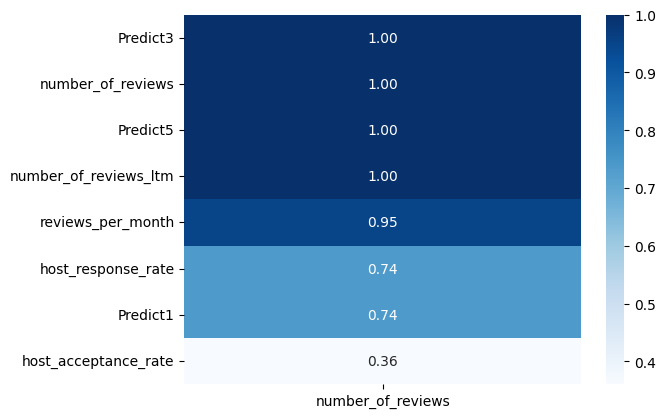

In [550]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(ReviewsModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map1

In [551]:
# Modelo original
df = df[df["room_type_num"] == 1]
df = df.drop("room_type_num", axis = 1)
df

# Separamos los datos cuantitativos
dfModel_2 = df.select_dtypes(np.number)
dfModel_2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
1972,20493911,2014,100.0,100.0,1.0,8,1,1,47.612660,-122.346240,...,419.0,8.60,184.0,1.0,44.0,4,3,6,3598.30,2
4439,501999514,2023,95.0,99.0,0.0,2870,1,1,47.604224,-122.335789,...,1.0,0.11,192.0,1.0,22.0,12,3,3,3754.75,2
4971,501999514,2023,95.0,99.0,0.0,2870,1,1,47.605802,-122.335951,...,0.0,1.78,319.0,1.0,22.0,12,3,3,6238.36,2
4972,501999514,2023,95.0,99.0,0.0,2870,1,1,47.604297,-122.335789,...,0.0,1.78,192.0,1.0,22.0,12,3,3,3754.75,2
4973,501999514,2023,95.0,99.0,0.0,2870,1,1,47.605370,-122.335660,...,1.0,0.17,319.0,2.0,22.0,12,3,3,6238.36,2
4974,501999514,2023,95.0,99.0,0.0,2870,1,1,47.605531,-122.335663,...,0.0,1.78,319.0,4.0,22.0,12,3,3,6238.36,2
4975,501999514,2023,95.0,99.0,0.0,2870,1,1,47.605720,-122.336230,...,0.0,1.78,319.0,2.0,22.0,12,3,3,6238.36,2
5968,25138314,2014,92.0,94.0,0.0,786,1,1,47.614650,-122.335650,...,0.0,1.78,197.0,1.0,19.0,4,3,3,3852.53,2
5969,25138314,2014,92.0,94.0,0.0,786,1,1,47.613151,-122.335880,...,0.0,1.78,197.0,1.0,19.0,12,3,3,3852.53,2
5971,25138314,2014,92.0,94.0,0.0,786,1,1,47.613950,-122.335800,...,0.0,1.78,197.0,2.0,19.0,4,3,3,3852.53,2


In [552]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['number_of_reviews'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,number_of_reviews
number_of_reviews,1.000000
host_is_superhost,0.999995
number_of_reviews_l30d,0.999995
bathroom_text_num,0.999995
number_of_reviews_ltm,0.999917
minimum_nights_avg_ntm,0.975441
amenities_num,0.968652
reviews_per_month,0.950610
longitude,0.946823
host_response_rate,0.736796


<Axes: >

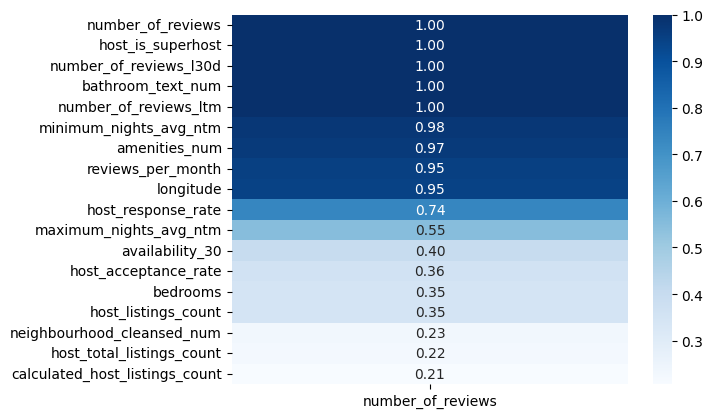

In [553]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(ReviewsModel_2, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

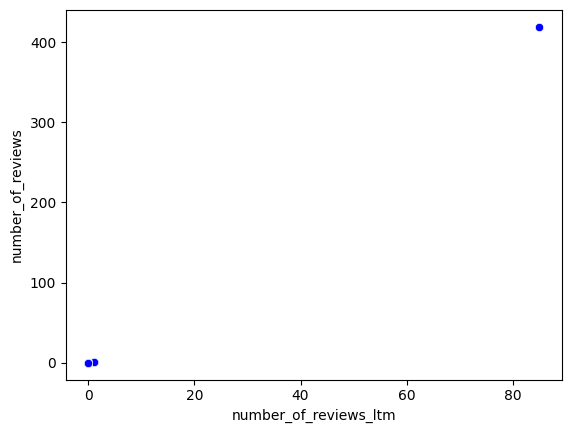

In [554]:
# Para este tipo de habitación "Hotel Room", el mejor modelo matemático simple que describe de mejor manera el número de reseñas es el siguiente:
from turtle import color
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = dfHome1)

In [555]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome1[["number_of_reviews_ltm"]]
Var_Dep = dfHome1[["number_of_reviews"]]

In [556]:
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[4.93300878]]),
 'rank_': 1,
 'singular_': array([82.86477797]),
 'intercept_': array([-0.38913161])}

## Modelo Matemático: y = 4.93300878x - 0.38913161

In [557]:
# Predecimos los valores de "number_of_reviews" a partir de la variable "number_of_reviews_ltm"
y_pred = model.predict(X = dfHome1[['number_of_reviews_ltm']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome1.insert(13, 'PredictFinal', y_pred)
dfHome1

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,PredictFinal,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1972,1,100.013806,100.0,103.097708,100.0,5.0,5.0,314.094555,5.0,184.0,314,96.274276,419.0,418.916615,1.948571,8.60,5.0,85
4439,1,96.107720,99.0,97.759952,95.0,5.0,5.0,316.190759,5.0,192.0,336,96.313494,1.0,4.543877,1.948571,0.11,5.0,1
4971,1,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,319.0,343,96.936084,0.0,-0.389132,1.948571,1.78,5.0,0
4972,1,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,192.0,343,96.313494,0.0,-0.389132,1.948571,1.78,5.0,0
4973,1,96.107720,99.0,97.759952,95.0,5.0,5.0,316.190759,5.0,319.0,336,96.936084,1.0,4.543877,1.948571,0.17,5.0,1
4974,1,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,319.0,330,96.936084,0.0,-0.389132,1.948571,1.78,5.0,0
4975,1,96.098375,99.0,97.759952,95.0,5.0,5.0,316.195774,5.0,319.0,325,96.936084,0.0,-0.389132,1.948571,1.78,5.0,0
5968,1,96.098375,94.0,94.557298,92.0,5.0,5.0,316.195774,5.0,197.0,282,96.338005,0.0,-0.389132,1.948571,1.78,5.0,0
5969,1,96.098375,94.0,94.557298,92.0,5.0,5.0,316.195774,5.0,197.0,278,96.338005,0.0,-0.389132,1.948571,1.78,5.0,0
5971,1,96.098375,94.0,94.557298,92.0,5.0,5.0,316.195774,5.0,197.0,326,96.338005,0.0,-0.389132,1.948571,1.78,5.0,0


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

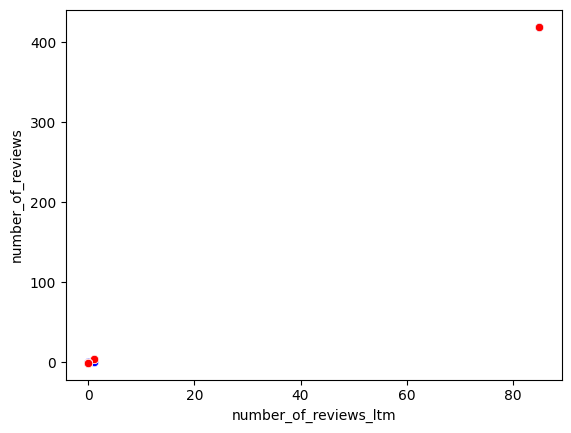

In [558]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = dfHome1)
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'PredictFinal', color = "red", data = dfHome1)

In [559]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeterFinal = model.score(X = Vars_Indep, y = Var_Dep)
coefDeterFinal

0.9998333520029209

In [560]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrelFinal = np.sqrt(coefDeterFinal)
coefCorrelFinal # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.9999166725297268